### 1 import libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

## 2. Load iris dataset

In [14]:
iris = load_iris()
X =iris.data
y = iris.target

In [15]:
# convert to Dataframe for readability
df = pd.DataFrame(X, columns = iris.feature_names)
df['species'] = y
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

### 3. Feature scaling

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Hierarchical Clustering (Agglomerative)

In [17]:
agg = AgglomerativeClustering(n_clusters = 3, linkage ="ward")
cluster_labels = agg.fit_predict(X_scaled)
df["Cluster"] = cluster_labels

In [18]:
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
### 5. Plot datapoints with respect to their assigned cluster

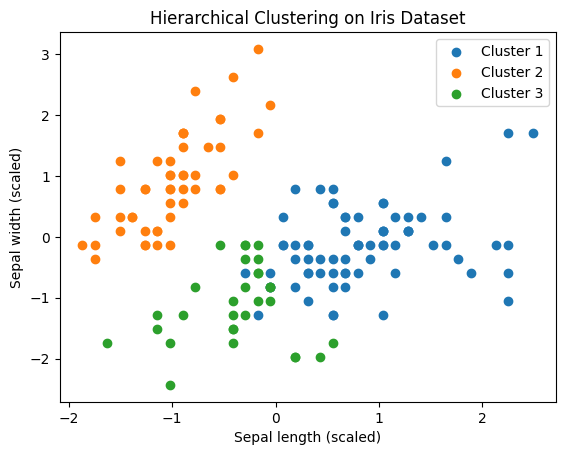

In [20]:
# plot 2D graphs
# Plot each cluster separately
for cluster_id in np.unique(cluster_labels):
    plt.scatter(
        X_scaled[cluster_labels == cluster_id, 0],
        X_scaled[cluster_labels == cluster_id, 1],
        label=f"Cluster {cluster_id + 1}"
    )

plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.title("Hierarchical Clustering on Iris Dataset")

plt.legend()
plt.show()

In [21]:
### 6. Generate Dendgrogram from the Iris dataset

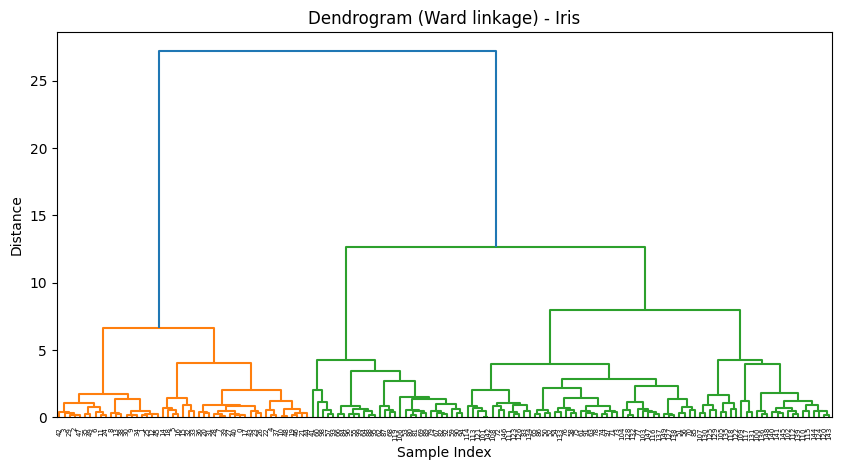

In [22]:
Z = linkage(X_scaled,method="ward")
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title("Dendrogram (Ward linkage) - Iris")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()